# p-Dispersion Problem

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Dispersion" data-toc-modified-id="p-Dispersion-1.1">p-Dispersion</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description


### p-Dispersion

It is assumed that there is a set of demand points and the total number of facilities is known. On the premise that the total number of facilities is fixed, determine which demand points to build facilities at, so as to **maximize the minimum distance between all demand points**.

*Parameters*:
* **$I$** : Collection of demand point locations
* **$P$** : Total number of facilities
* **$d_{ij}$** : Distance between point $i$ and point $j$

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
$$
\begin{array}{lll}
\text{Max} & \sum D_{min } & (1)\\
\text{s.t.} & \sum_{i \in I} X_i=P, & (2)\\
& X_j X_k d_{j k} \geq D_{\min } X_j X_k, \forall j, k \in I, & (3)\\
& X_i \in\{0,1\},\forall i \in I . & (4)
\end{array}
$$

        

## Setup

In [4]:
import random
from itertools import product
import numpy as np
import osmnx as ox
import pandas as pd

from location.PModel import *

In [5]:
np.random.seed(0) # random seed
random.seed(0)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

### Random Data

In [7]:
num_points = 20
points = [(random.random(), random.random()) for i in range(num_points)]
num_located = 4  # P: number of located facility in the end
cartesian_prod = list(product(range(num_points), range(num_points)))
selected, selected_points, unselected_points  = PDispersion(num_points=num_points,
                                                            num_located=num_located,
                                                            cartesian_prod=cartesian_prod,
                                                            cover=points,
                                                            solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [4, 11, 14, 16]
Minimum minimum distance between two points =  0.6665249


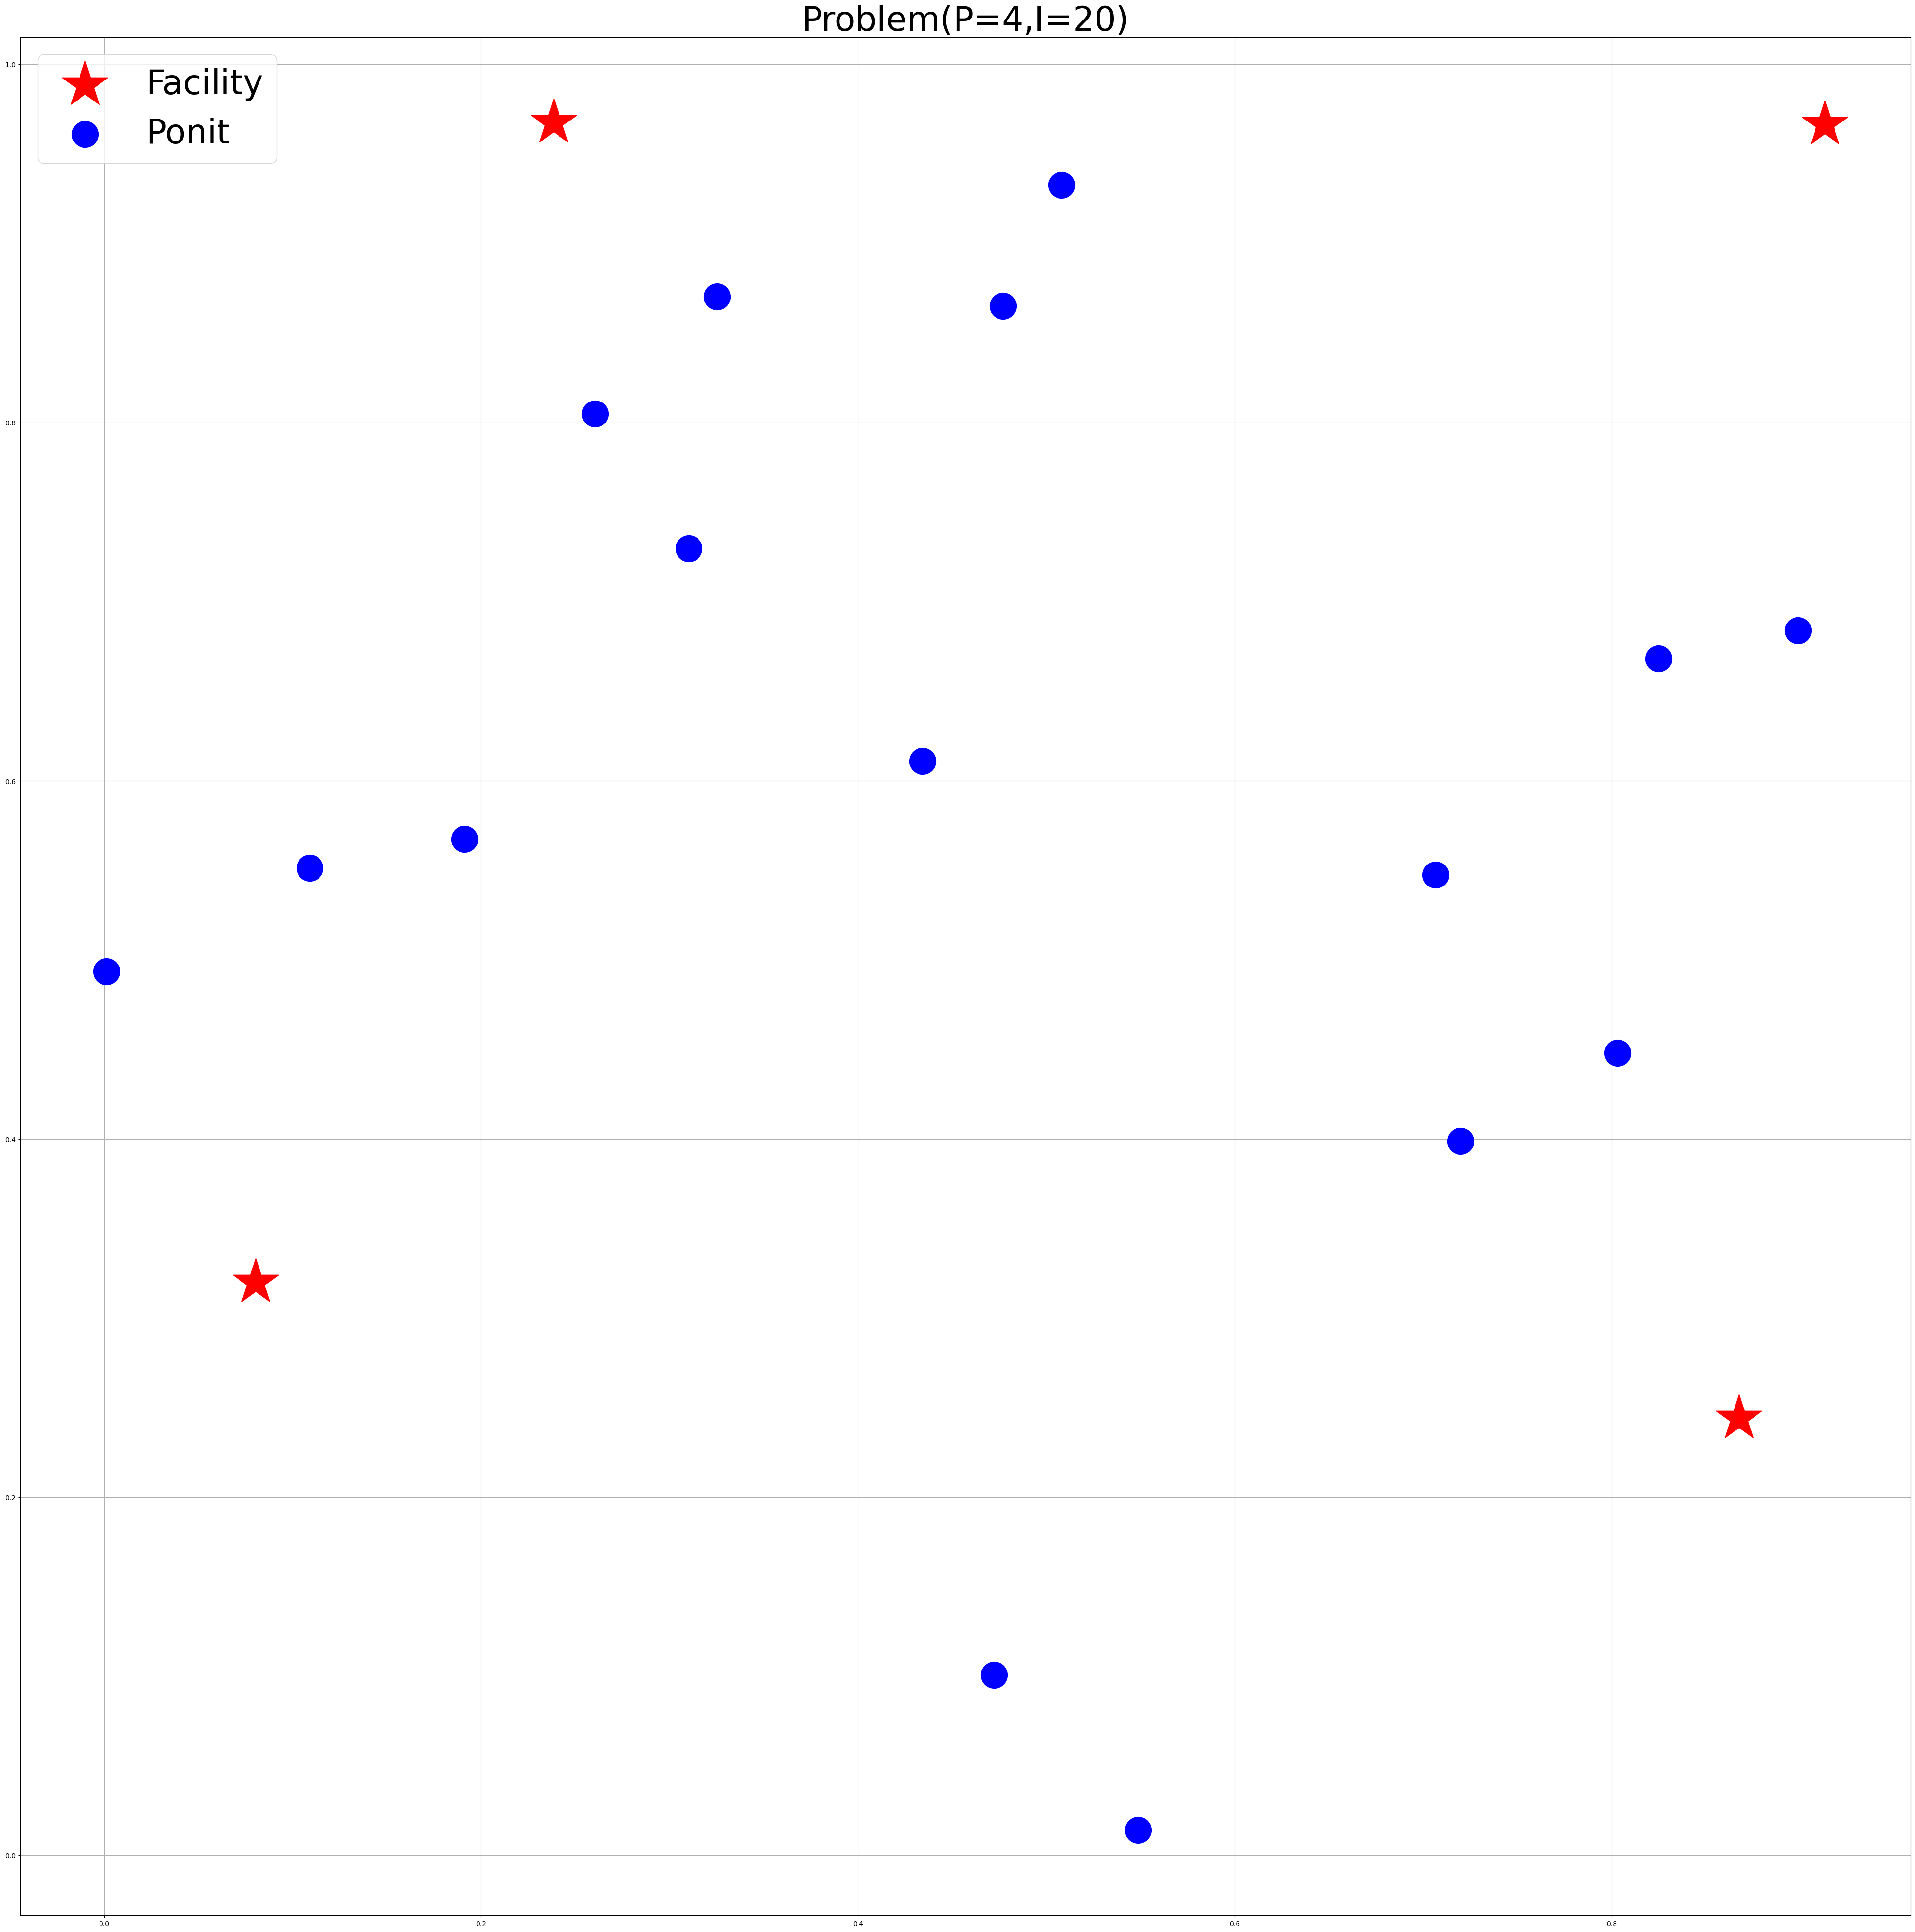

In [8]:
#Image representation
plt.figure(figsize=(50,50))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=5000,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=1500, label = 'Ponit', zorder=3)

plt.grid(True)   
plt.legend(loc='best', fontsize = 50) 
plt.show()

### Road Network Data

In [5]:
### Road Network Data
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
selected, selected_points, unselected_points  = PDispersion(num_points=num_points,
                  num_located=num_located,
                  cartesian_prod=cartesian_prod,
                  cover=points,
                  solver=SCIP_CMD()).prob_solve()

Status: Optimal
Selected positions = [3, 31, 37, 39, 52, 59, 89, 91, 104, 111]
Minimum minimum distance between two points =  0.0817269839999994


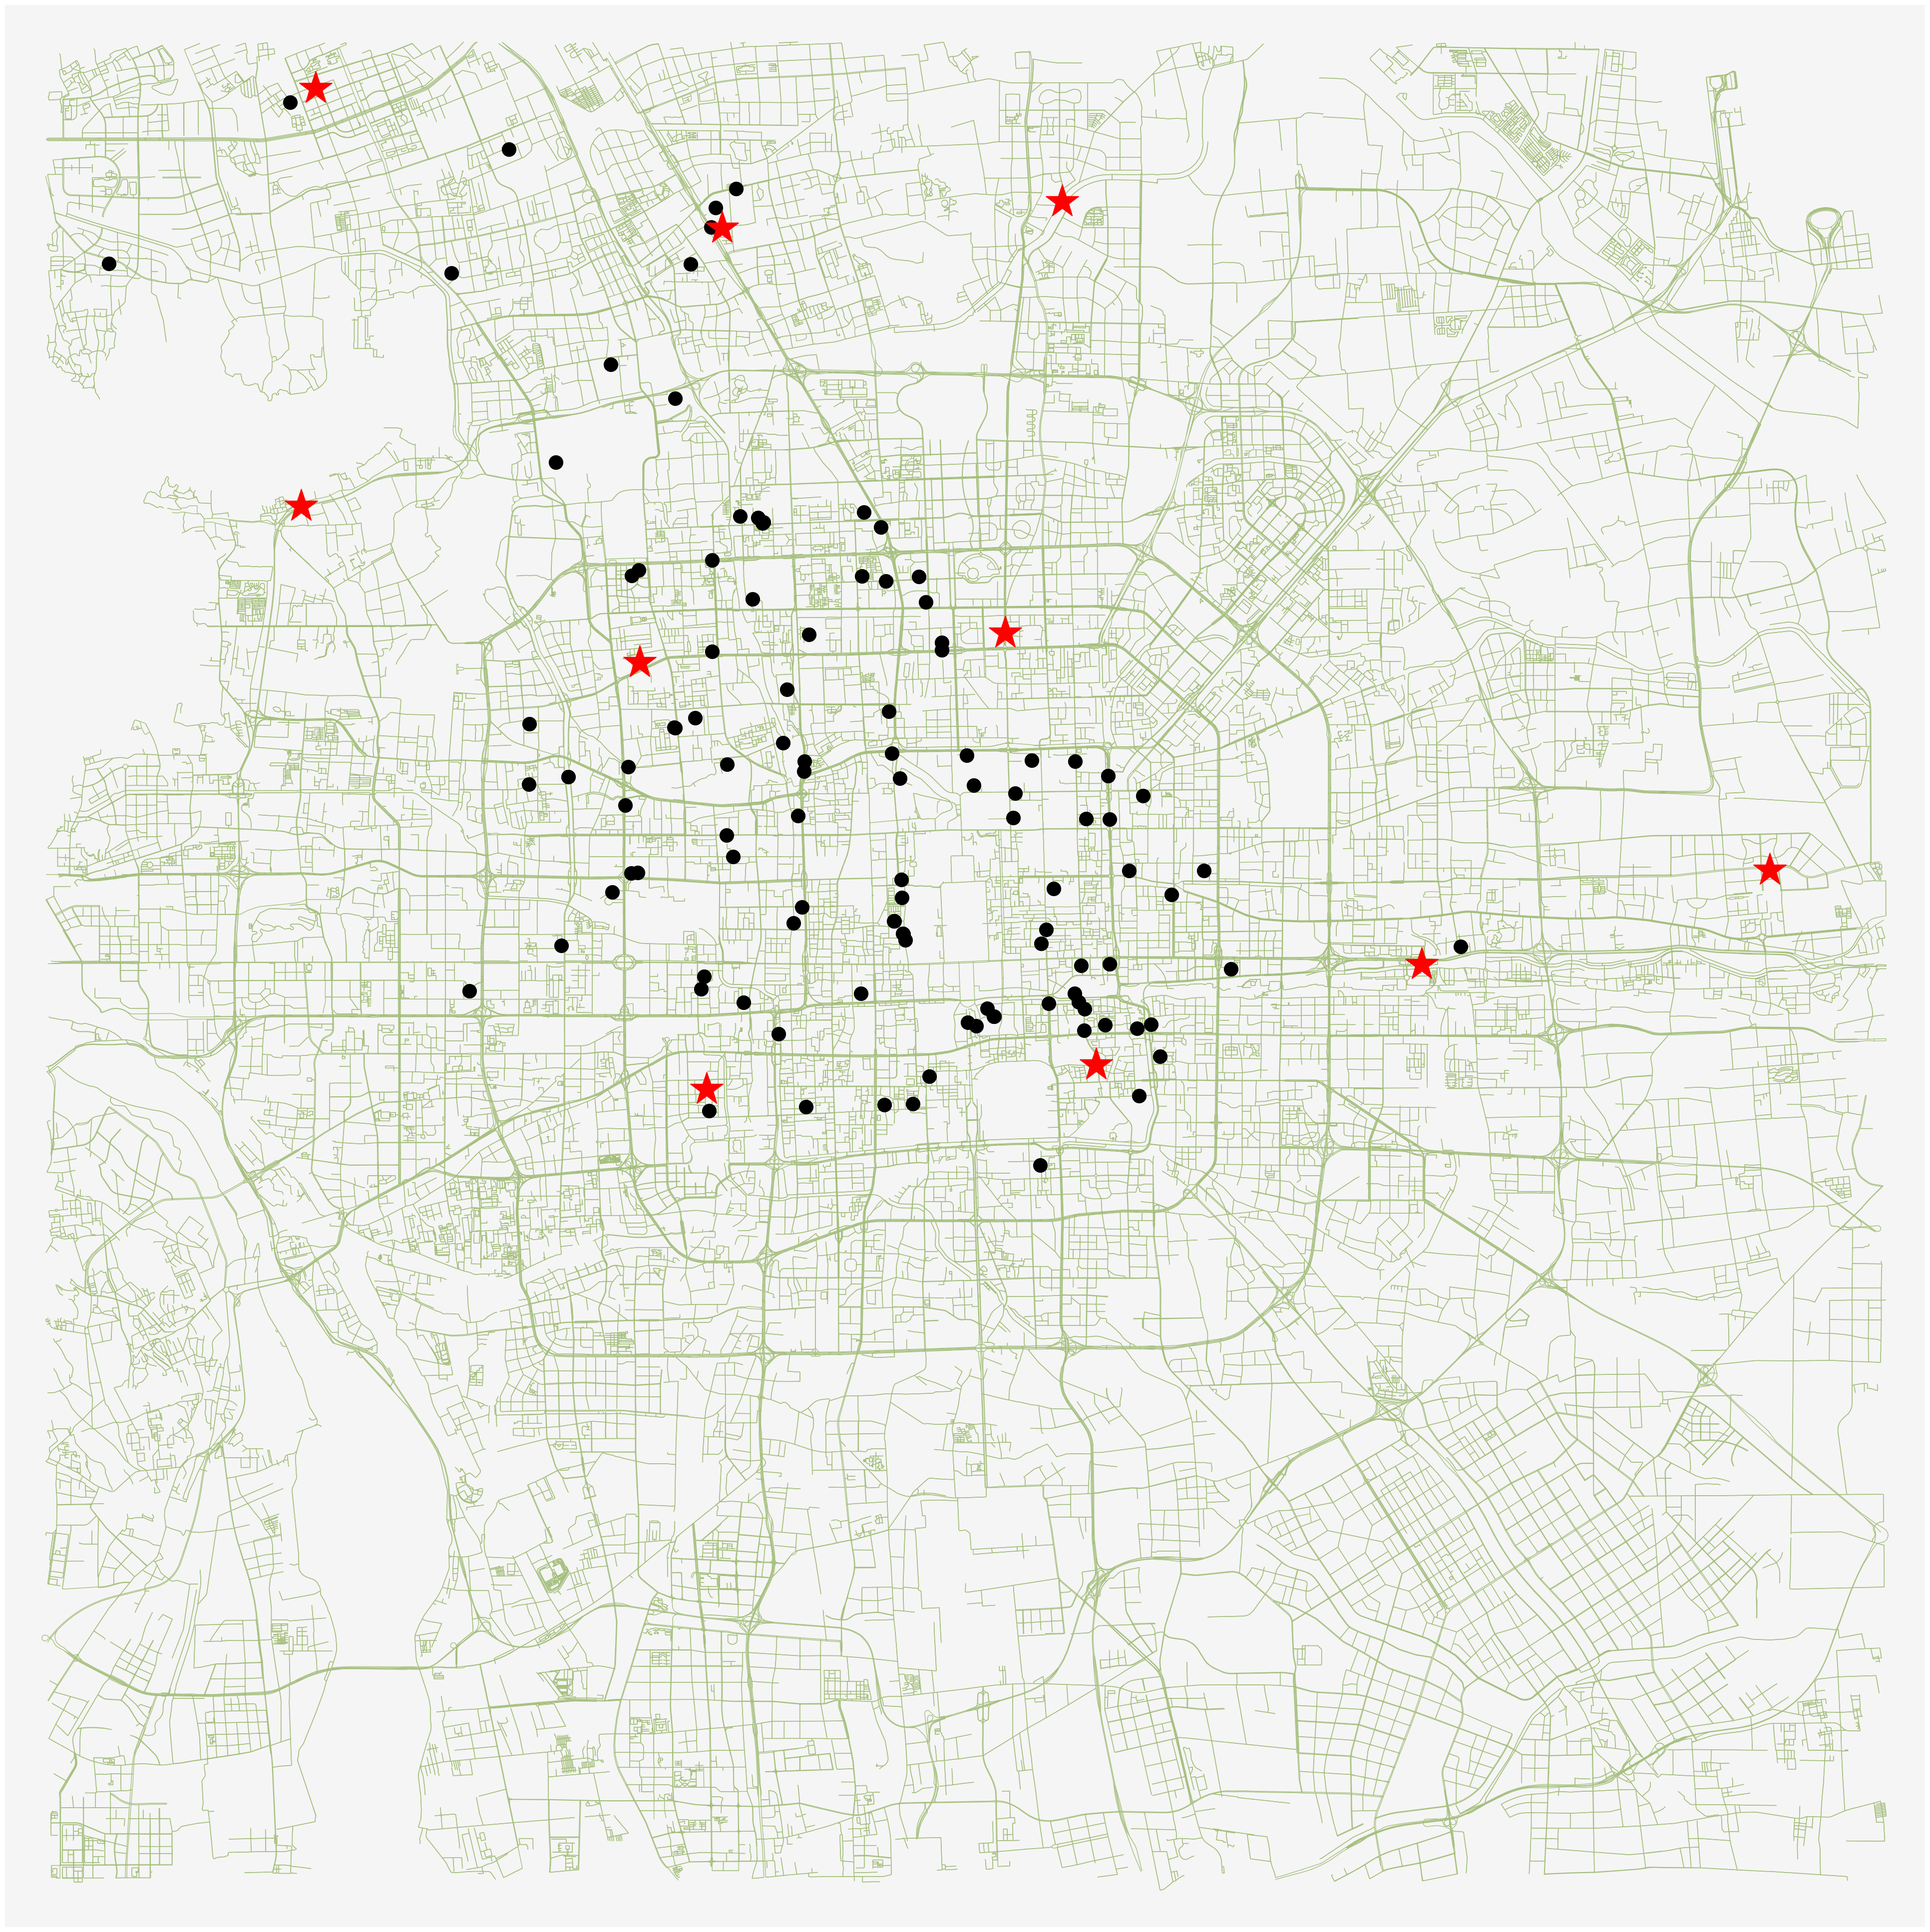

In [8]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)